In [25]:
import re
from pdfminer.high_level import extract_text
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [62]:
text = extract_text("../sample.pdf")

In [56]:
df = []
for line in text.split('\n'):

    if re.match(r"^\d{2}\.\d{2}\.\d{2}\s", line):
        
        transaction = list(filter(None, re.split(r'\s{2,}', line)))

        transaction.insert(2, "NULL") if len(transaction) == 4 else next

        df.append({
            "DATE": transaction[0],
            "INFO": transaction[1],
            "ACC": transaction[2],
            "AMOUNT": transaction[3],
            "STATE": transaction[4]
        })

In [ ]:
df = []
for line in text.split('\n'):

    if re.match(r"^\d{2}\.\d{2}\.\d{2}", line):
        transaction = re.split(r'\s{2,}', line)

In [57]:

df = pd.DataFrame(df)

df["DATE"] = pd.to_datetime(df['DATE'], format="%d.%m.%y")

df["AMOUNT"] = df["AMOUNT"].str.replace(".", "")
df["AMOUNT"] = df["AMOUNT"].str.replace(",", ".")
df["AMOUNT"] = pd.to_numeric(df["AMOUNT"])

df["STATE"] = df["STATE"].str.replace(".", "")
df["STATE"] = df["STATE"].str.replace(",", ".")
df["STATE"] = pd.to_numeric(df["STATE"])

C:\Users\bracu\AppData\Local\Temp\ipykernel_10052\2905340159.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["AMOUNT"] = df["AMOUNT"].str.replace(".", "")
C:\Users\bracu\AppData\Local\Temp\ipykernel_10052\2905340159.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["STATE"] = df["STATE"].str.replace(".", "")


In [58]:
df

,DATE,INFO,ACC,AMOUNT,STATE
0,2022-11-29,SUPERMARKET MAXI,NULL,-1.49,1771.74
1,2022-11-30,SPAR SLOVENCEVA,NULL,-3.60,1768.14
2,2022-12-01,SLAPNIK URSULA,SI56 0201 0282 0059 626,-8.40,1759.74
3,2022-12-01,SUPERMARKET MAXI,NULL,-1.69,1758.05
4,2022-12-01,SPAR SLOVENCEVA,NULL,-6.79,1751.26
...,...,...,...,...,...
100,2022-12-30,PROVIZIJA,NULL,-0.40,2216.31
101,2022-12-30,SPL D.D.,SI56 0292 2002 0148 350,-175.75,2040.56
102,2022-12-30,PROVIZIJA,NULL,-0.40,2040.16
103,2022-12-30,TIN NAPRET,SI56 0400 1002 0285 793,10.00,2050.16


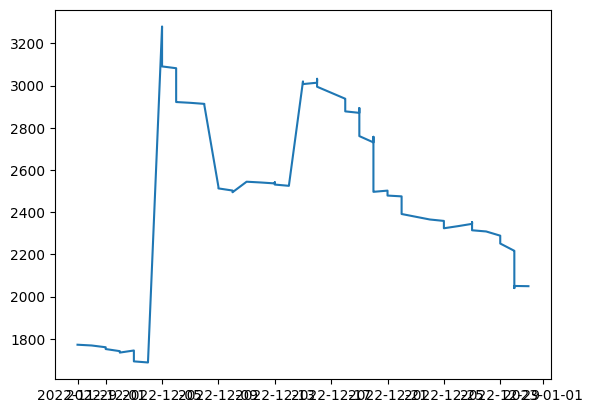

In [59]:
plt.plot(df["DATE"], df["STATE"])
plt.show()

In [60]:
df["SIGN"] = ["PLUS" if i > 0 else "MINUS" for i in df.AMOUNT]

In [61]:
df.groupby("SIGN").sum()

C:\Users\bracu\AppData\Local\Temp\ipykernel_10052\2410982931.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("SIGN").sum()


,AMOUNT,STATE
SIGN,,
MINUS,-1996.38,207177.77
PLUS,2272.30,61527.75


In [63]:
df.to_csv("df.csv")